<a href="https://colab.research.google.com/github/Raghav-Gupta24/SMS-Spam-Detection/blob/main/Spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement: Given SMS data, we need to create a classification model that can classify SMS as spam or ham

Dataset link: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

Note :- 
- `spam` => Spam is any kind of unwanted or promotional emails/messages
- `ham` => not spam mails or messages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]

In [4]:
!gdown 17m5mPzBPVY0K6aMFYzbynrz30Dwfx64L

Downloading...
From: https://drive.google.com/uc?id=17m5mPzBPVY0K6aMFYzbynrz30Dwfx64L
To: /content/spam.csv
100% 504k/504k [00:00<00:00, 87.1MB/s]


In [5]:
df = pd.read_csv('/content/spam.csv', encoding = "ISO-8859-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


So there are 3 columns with a lot of NaN values.

In [6]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Out of a total of 5572 rows, 5500+ entries of `Unnamed: 2`, `Unnamed: 3` and `Unnamed: 4` are NaN, so we can't really do anything about them, we need to drop these columns.

In [7]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace = True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.dtypes

v1    object
v2    object
dtype: object

Let's properly rename our columns.

In [9]:
df.rename(columns={'v1':'spam', 'v2':'sms'}, inplace=True)
df.head()

,spam,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Checking duplicate entries

In [10]:
df[df.duplicated() == True]

,spam,sms
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


Having duplicate entries in the data will only increase computation, without any information gain, therefore let's drop them.

In [11]:
df.drop_duplicates(inplace=True)
df

,spam,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
5572 - 403

5169

Since 403 rows were dropped, we have $5572 - 403 = 5169$ rows now.

---

### EDA

In [13]:
df['spam'].value_counts()

ham     4516
spam     653
Name: spam, dtype: int64

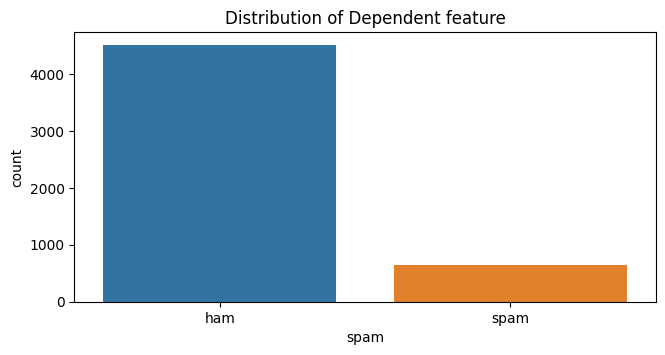

In [14]:
sns.countplot(x = df['spam'])
plt.title('Distribution of Dependent feature')
plt.show()

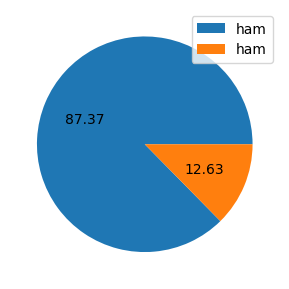

In [15]:
plt.pie(x = df['spam'].value_counts(), autopct='%.2f')
plt.legend(df.spam)
plt.show()

Therefore we have imbalanced data.

#### Target Encoding.

In [16]:
df['spam'] = df['spam'].map({'spam':1,'ham':0})
df.head()

,spam,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Text PreProcessing

We need to do the following:-
- Stop word removal
- Punctuation removal
- Tokenisation
- Lowercasing
- Stemming

In [17]:
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
print(nltk.corpus.stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
ps = PorterStemmer()

def clean_tokenized_sentence(s):
    # Create empty string to store processed sentence.
    cleaned_s = ""  

    words = nltk.word_tokenize(s)
    
    for word in words:
        # Convert to lowercase 
        c_word = word.lower()

        # Remove stopwords and punctuations
        if c_word != '' and c_word not in nltk.corpus.stopwords.words('english') and c_word.isalnum():
            # Append the stemmed word into cleaned sms
            cleaned_s = cleaned_s + " " + ps.stem(c_word)

    return(cleaned_s.strip())

In [20]:
df["cleaned_sms"] = df["sms"].apply(clean_tokenized_sentence)
df.head(10)

,spam,sms,cleaned_sms
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,per request mell oru minnaminungint nurungu ve...
8,1,WINNER!! As a valued network customer you have...,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,mobil 11 month u r entitl updat latest colour ...


### 20 most frequently occuring words in spam and non-spam sms

In [21]:
ham = df[df['spam'] == 0]['cleaned_sms']
spam = df[df['spam'] == 1]['cleaned_sms']
spam

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send 87...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: cleaned_sms, Length: 653, dtype: object

Now, to get a list of words belonging to the respective category, we first need to join all SMS to form a single text of the given category, and then tokenise that string.

In [22]:
ham = " ".join(ham)
spam = " ".join(spam)
spam

'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18 freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv winner valu network custom select receivea prize reward claim call 09061701461 claim code kl341 valid 12 hour mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030 six chanc win cash 100 pound txt csh11 send 87575 cost 6day tsandc appli repli hl 4 info urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub use credit click wap link next txt messag click http england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq thank subscript rington uk mobil charg pleas confirm repli ye repli charg 07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow sm ac sptv new jer

In [23]:
ham = ham.split(' ')
spam = spam.split(' ')
spam

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 '09061701461',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 '87575',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 '

Now that we have a list of words, let's get the number of times each word occurs, i.e. their frequency by using `collections.Counter()`

In [24]:
from collections import Counter

In [25]:
counter_ham = Counter(ham).most_common(20)
counter_spam = Counter(spam).most_common(20)

Plotting the most frequent words

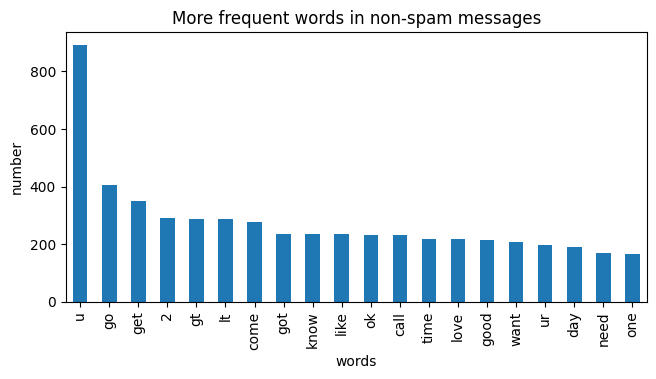

In [26]:
# load the results as a pandas dataframe in order to plot
df_ham = pd.DataFrame(counter_ham)

# Renaming the columns in this dataframe
df_ham = df_ham.rename(columns={0:"words in non-spam", 1:"count"})

# Plotting the data
df_ham.plot.bar(legend = False)
y_pos = np.arange(len(df_ham["words in non-spam"]))
plt.xticks(y_pos, df_ham["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

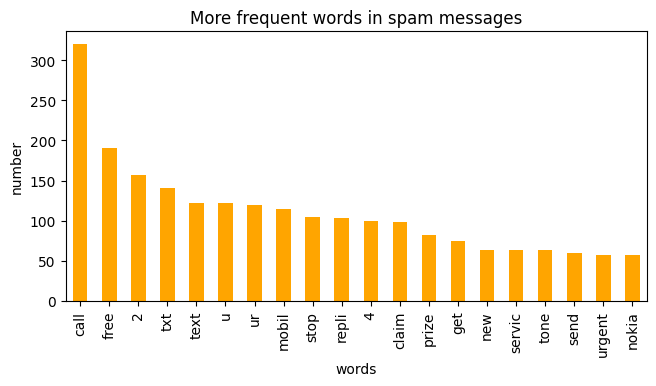

In [27]:
df_spam = pd.DataFrame(counter_spam)

# Renaming the columns in this dataframe
df_spam = df_spam.rename(columns={0:"words in spam", 1:"count_"})

# Plotting the data
df_spam.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df_spam["words in spam"]))
plt.xticks(y_pos, df_spam["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

### Train - Test Split

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['cleaned_sms'], df['spam'], 
                                                    test_size=0.25, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(3876,), (1293,)]


---

### Feature Extraction

Though there are multiple ways to transform the given text data into numerical features, let's consider `tf-idf`

Naturally, the resultant features will be a sparse matrix.


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
# Tfidf
t = TfidfVectorizer()
X_train = t.fit_transform(X_tr)
X_test = t.transform(X_test)

print(X_train.shape, X_test.shape)
y_train.shape, y_test.shape

(3876, 5764) (1293, 5764)


((3876,), (1293,))

In [30]:
X_train.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

---

### Training and Evaluating models.

#### 1. Logistic Regression

Note: We do not need to scale the values.

In [31]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [32]:
# Tackle imbalance
sm = SMOTE(random_state = 2)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)
X_train_bal.shape, y_train_bal.shape, X_test.shape

((6818, 5764), (6818,), (1293, 5764))

In [33]:
lambd = [1, 0.5, 0.1, 0.01, 0.001, 0.0001, 0.00001]

params = {
    'C': []
}

for i in lambd:
  params['C'].append(1/i)

# Setting max_iter = 200, because with default value of 100, it was not able to converge
model = LogisticRegression(max_iter=200)

# Grid Search
clf = GridSearchCV(model, params, scoring = "f1", cv=5)
clf.fit(X_train_bal, y_train_bal)
res = clf.cv_results_

In [34]:
res

{'mean_fit_time': array([0.03405514, 0.04853439, 0.05934958, 0.08669748, 0.10493875,
        0.10915203, 0.07679987]),
 'std_fit_time': array([0.00699615, 0.01009784, 0.00322878, 0.01149555, 0.01150299,
        0.03831611, 0.01062963]),
 'mean_score_time': array([0.00184083, 0.00292163, 0.00192122, 0.00195956, 0.00215569,
        0.00187964, 0.00186062]),
 'std_score_time': array([1.53531199e-04, 1.98504301e-03, 9.14050192e-05, 2.84659643e-04,
        3.69114732e-04, 6.86498798e-05, 9.32373341e-05]),
 'param_C': masked_array(data=[1.0, 2.0, 10.0, 100.0, 1000.0, 10000.0,
                    99999.99999999999],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1.0},
  {'C': 2.0},
  {'C': 10.0},
  {'C': 100.0},
  {'C': 1000.0},
  {'C': 10000.0},
  {'C': 99999.99999999999}],
 'split0_test_score': array([0.97028232, 0.97935103, 0.98973607, 0.99341624, 0.99560761,
        0.99560761, 0.99561404]),
 'spl

In [35]:
clf.best_params_['C'], clf.best_score_

(99999.99999999999, 0.9976588917569936)

Therefore the best cross validation performance is achieved with `lambda = 0.00001` with `F1 score = 0.9976`

In [36]:
model = LogisticRegression(C = 1/1e-05, max_iter=200)
model.fit(X_train_bal, y_train_bal)
y_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(y_pred, y_test), f1_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1119
           1       0.89      0.95      0.92       174

    accuracy                           0.98      1293
   macro avg       0.94      0.96      0.95      1293
weighted avg       0.98      0.98      0.98      1293
 0.9166666666666667


**Personal Note:**
- $F1 \ score = 0.9167 \neq 0.9976$

- This is because 0.9976 is the score when the model is cross validated on K-folded training set.

- But when evaluated against test data, F1 score is 0.9167

---

#### 2. SVM

In [38]:
from sklearn.svm import SVC

In [39]:
params = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
    }

model = SVC()

# Grid Search
clf = GridSearchCV(model, params, scoring = "f1", cv=5)
clf.fit(X_train_bal, y_train_bal)
res = clf.cv_results_

In [42]:
clf.best_params_, clf.best_score_

({'C': 10, 'gamma': 1}, 0.9994130589541722)

In [43]:
model = SVC(C = 10, gamma = 1)
model.fit(X_train_bal, y_train_bal)
y_pred = model.predict(X_test)

In [44]:
print(classification_report(y_pred, y_test), f1_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1132
           1       0.85      0.99      0.92       161

    accuracy                           0.98      1293
   macro avg       0.93      0.98      0.95      1293
weighted avg       0.98      0.98      0.98      1293
 0.9164265129682998


---
#### 3. Random Forest

In [1]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
params = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' : ['gini', 'entropy']
}

model = RandomForestClassifier(random_state=42)

# Grid Search
clf = GridSearchCV(model, params, scoring = "f1", cv=5)
clf.fit(X_train_bal, y_train_bal)
res = clf.cv_results_

In [36]:
clf.best_params_, clf.best_score_

({'criterion': 'entropy',
  'max_depth': 8,
  'max_features': 'log2',
  'n_estimators': 500},
 0.9520306249767632)

In [42]:
model = RandomForestClassifier(max_depth=8, criterion='entropy', random_state=42, 
                               max_features='log2', n_estimators=500)
model.fit(X_train_bal, y_train_bal)
y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(y_pred, y_test), f1_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1167
           1       0.68      1.00      0.81       126

    accuracy                           0.95      1293
   macro avg       0.84      0.97      0.89      1293
weighted avg       0.97      0.95      0.96      1293
 0.8076923076923077


---
#### 4. Multinomial Naive Bayes

For this, the features need to be extracted in a different way than tfidf.

The features need to just signify the term frequency. This can be done using `CountVectorizer`

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
# Need to derive train and test sets again from df
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_sms'], df['spam'], 
                                                    test_size=0.25, random_state=42)
# CountVectorizer
c = CountVectorizer()
X_train = c.fit_transform(X_train)
X_test = c.transform(X_test)

print(X_train.shape, X_test.shape)
y_train.shape, y_test.shape

(3876, 5764) (1293, 5764)


((3876,), (1293,))

In [59]:
# Tackle imbalance
sm = SMOTE(random_state = 2)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)
X_train_bal.shape, y_train_bal.shape, X_test.shape

((6818, 5764), (6818,), (1293, 5764))

Taking different values of Laplace Smoothing constant

In [51]:
params = {
        'alpha':[0.01, 0.1, 1, 10]
        }

In [49]:
from sklearn.naive_bayes import MultinomialNB

In [52]:
model = MultinomialNB()

clf = GridSearchCV(model, params, scoring = "f1", cv=5)

clf.fit(X_train_bal, y_train_bal)

res = clf.cv_results_

In [53]:
clf.best_params_, clf.best_score_

({'alpha': 0.1}, 0.8341029812797741)

In [54]:
model = MultinomialNB(alpha=0.1)
model.fit(X_train_bal, y_train_bal)
y_pred = model.predict(X_test)

In [55]:
print(classification_report(y_pred, y_test), f1_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1099
           1       0.89      0.86      0.87       194

    accuracy                           0.96      1293
   macro avg       0.93      0.92      0.93      1293
weighted avg       0.96      0.96      0.96      1293
 0.8736842105263158


---
#### 5. Gaussian Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB

In [64]:
model = GaussianNB()

# need to apply .toarray() because input must be a dense array
model.fit(X_train_bal.toarray(), y_train_bal)
y_pred = model.predict(X_test.toarray())

In [65]:
print(classification_report(y_pred, y_test), f1_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       993
           1       0.87      0.54      0.66       300

    accuracy                           0.87      1293
   macro avg       0.87      0.76      0.79      1293
weighted avg       0.87      0.87      0.86      1293
 0.6625514403292181


Summarizing our findings:-

Model | Accuracy | F1 score
--- | --- | ---
LogReg | 0.98 | 0.9167
SVM | 0.98 |  0.9164
Random Forest | 0.95 | 0.8076
Multinomial NB | 0.96 | 0.8737
Gaussian NB | 0.87 | 0.6625


Therefore, we can say that **Logistic Regression works best on this data**.

### TODO

In [ ]:
text = "Nigeran price needs your help. Send money"